<a href="https://colab.research.google.com/github/JayPiRDD/rna-classificador-imagens/blob/main/projeto_dataset_rna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importando as bibliotecas necessárias
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import os


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Define o caminho base onde o dataset está armazenado no Google Drive
base_dir = '/content/drive/MyDrive/DIO_Projetos/meu_dataset'

# Define o caminho completo da pasta de treino, concatenando com o diretório base
train_dir = base_dir + '/treino'

# Define o caminho completo da pasta de validação, concatenando com o diretório base
validation_dir = base_dir + '/validacao'

# Imprime o caminho completo do diretório de treino
print("Diretório treino:", train_dir)

# Imprime o caminho completo do diretório de validação
print("Diretório validação:", validation_dir)


Diretório treino: /content/drive/MyDrive/DIO_Projetos/meu_dataset/treino
Diretório validação: /content/drive/MyDrive/DIO_Projetos/meu_dataset/validacao


In [30]:
# Importa a classe ImageDataGenerator para pré-processamento de imagens e geração de batches de dados
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Cria um gerador de dados para o conjunto de treino, normalizando os pixels (de 0-255 para 0-1)
train_datagen = ImageDataGenerator(rescale=1./255)

# Cria um gerador de dados para o conjunto de validação, também normalizando os pixels
validation_datagen = ImageDataGenerator(rescale=1./255)

# Cria o gerador de treino que:
# - Lê imagens da pasta especificada
# - Redimensiona cada imagem para 128x128 pixels
# - Agrupa as imagens em batches de 32
# - Define que o problema é binário (duas classes: ex: gato e cachorro)
train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/DIO_Projetos/meu_dataset/treino',  # Caminho das imagens de treino
    target_size=(128, 128),  # Tamanho padrão para todas as imagens
    batch_size=32,  # Número de imagens por batch
    class_mode='binary'  # Tipo de classificação (duas classes)
)

# Cria o gerador de validação com as mesmas configurações do de treino
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/DIO_Projetos/meu_dataset/validacao',  # Caminho das imagens de validação
    target_size=(128, 128),  # Tamanho padrão para todas as imagens
    batch_size=32,  # Número de imagens por batch
    class_mode='binary'  # Tipo de classificação (duas classes)
)


Found 202 images belonging to 2 classes.
Found 202 images belonging to 2 classes.


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Defino o modelo sequencial com camadas convolucionais e densas
model = Sequential([
    # Primeira camada convolucional: 32 filtros 3x3 + ReLU
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Segunda camada convolucional
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Terceira camada convolucional
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Camada para achatar os dados
    Flatten(),

    # Camada densa (neurônio totalmente conectado)
    Dense(128, activation='relu'),

    # Saída com 1 neurônio (para classificação binária)
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 140s 21s/step - accuracy: 0.4684 - loss: 0.9182 - val_accuracy: 0.5000 - val_loss: 0.6921
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.4738 - loss: 0.6943 - val_accuracy: 0.6337 - val_loss: 0.6896
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5341 - loss: 0.6922 - val_accuracy: 0.7129 - val_loss: 0.6861
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.5885 - loss: 0.6873 - val_accuracy: 0.5248 - val_loss: 0.6806
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.5723 - loss: 0.6827 - val_accuracy: 0.5000 - val_loss: 0.7114
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.5732 - loss: 0.6894 - val_accuracy: 0.7970 - val_loss: 0.6415
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6873 - loss: 0.6490 - val_accuracy: 0.7624 - val_loss: 0.6043
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7709 - loss: 0.5864 - val_accuracy: 0.6980 - val_loss: 0.5468
Epoch 9/10

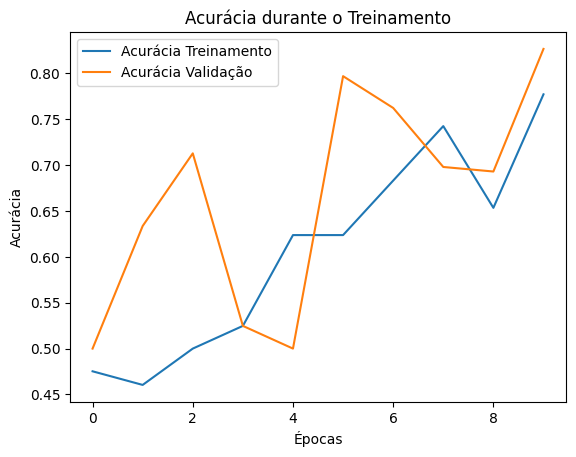

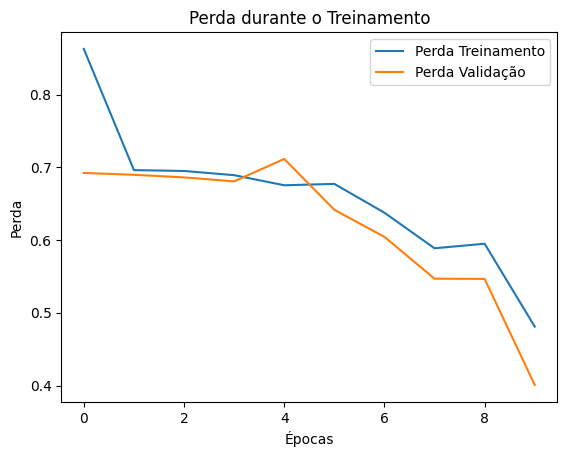

In [9]:
import matplotlib.pyplot as plt

# Acurácia
plt.plot(history.history['accuracy'], label='Acurácia Treinamento')
plt.plot(history.history['val_accuracy'], label='Acurácia Validação')
plt.title('Acurácia durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()
plt.show()

# Perda
plt.plot(history.history['loss'], label='Perda Treinamento')
plt.plot(history.history['val_loss'], label='Perda Validação')
plt.title('Perda durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step


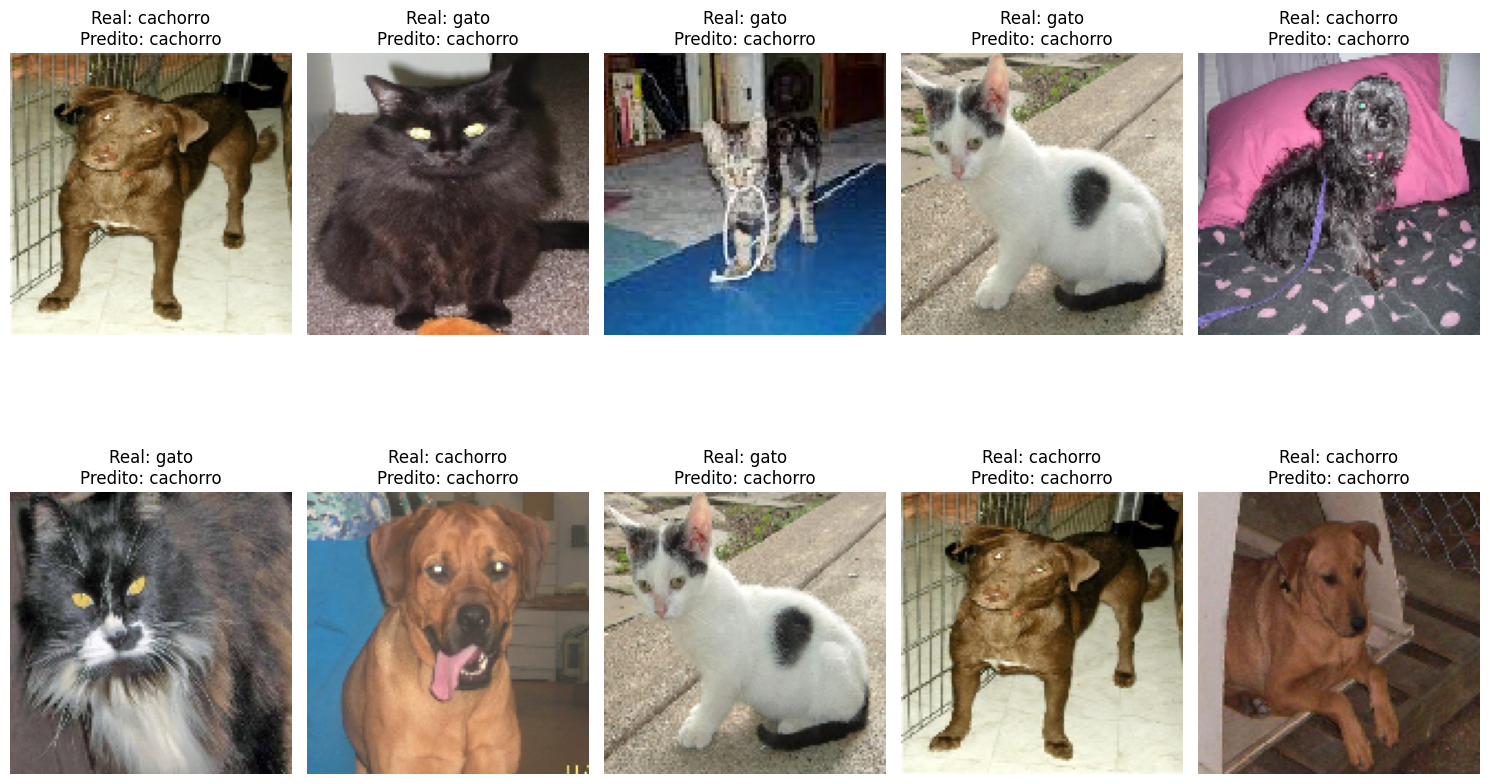

In [29]:
# Importa a biblioteca NumPy para operações numéricas
import numpy as np

# Importa o Matplotlib para exibição de gráficos e imagens
import matplotlib.pyplot as plt

# Importa a biblioteca random para selecionar imagens aleatoriamente
import random

# Obtém os nomes das classes (ex: 'gato', 'cachorro') a partir do gerador de validação
class_names = list(validation_generator.class_indices.keys())

# Pega o próximo batch de imagens e rótulos do gerador de validação
images, labels = next(validation_generator)

# Usa o modelo treinado para fazer previsões nas imagens do batch
predictions = model.predict(images)

# Converte as previsões (probabilidades) em classes previstas (índices das classes)
predicted_classes = np.argmax(predictions, axis=1)

# Garante que os rótulos verdadeiros estão em formato inteiro (caso não estejam)
# Como os rótulos já vêm como inteiros, não usamos argmax aqui
true_classes = labels.astype(int)

# Cria uma nova figura com tamanho 15x10 polegadas
plt.figure(figsize=(15, 10))

# Loop para exibir 10 imagens aleatórias do batch
for i in range(10):
    # Escolhe um índice aleatório dentro do tamanho do batch
    idx = random.randint(0, len(images) - 1)

    # Cria um subplot 2x5 (2 linhas, 5 colunas) na posição i+1
    plt.subplot(2, 5, i + 1)

    # Mostra a imagem selecionada
    plt.imshow(images[idx])

    # Remove os eixos para deixar mais limpo
    plt.axis('off')

    # Adiciona o título com as classes real e prevista
    plt.title(f"Real: {class_names[true_classes[idx]]}\nPredito: {class_names[predicted_classes[idx]]}")

# Ajusta automaticamente o layout para evitar sobreposição
plt.tight_layout()

# Exibe todas as imagens na tela
plt.show()
